# import the labraries

In [546]:
import pandas as pd
import numpy as np
import mysql.connector


# load data

In [617]:
df=pd.read_csv('airline_delay_data2.csv')

# inspect the data

In [624]:
df.head()
df.tail()
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44,3,1.63,0,...,0,1.25,0,1,89,56,0,3,0,30
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90,1,0.96,0,...,0,0.00,0,0,23,22,0,1,0,0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88,8,5.75,0,...,0,0.65,0,1,338,265,0,45,0,28
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184,9,4.17,0,...,0,3.00,0,0,508,192,0,92,0,224
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76,11,4.78,0,...,0,1.00,1,0,692,398,0,178,0,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56,8,2.20,1,...,0,0.80,0,1,353,165,19,135,0,34
3339,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76,17,7.51,0,...,0,5.12,0,0,1880,1516,25,200,0,139
3340,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7,1,0.00,0,...,0,0.00,0,0,96,0,46,50,0,0
3341,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12,1,0.00,0,...,0,0.00,0,0,23,0,0,23,0,0


# check the data information

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3343 non-null   int64  
 1   month                3343 non-null   int64  
 2   carrier              3343 non-null   object 
 3   carrier_name         3343 non-null   object 
 4   airport              3343 non-null   object 
 5   airport_name         3343 non-null   object 
 6   arr_flights          3343 non-null   int64  
 7   arr_del15            3343 non-null   int64  
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   int64  
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   int64  
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   int64  
 14  arr_diverted         3343 non-null   int64  
 15  arr_delay            3343 non-null   i

In [630]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,3343.000000,3343.0,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.00000,3343.000000,3343.000000
mean,2019.458271,12.0,298.271014,50.995214,16.065337,1.438827,16.183383,0.135806,17.166069,2.884535,0.575830,3333.868083,1144.763087,177.591385,749.57942,5.400838,1256.533353
std,0.498330,0.0,852.436335,146.484456,41.759516,4.828701,56.423008,0.651919,55.447043,10.126658,2.097884,10284.926623,3371.103512,734.343542,3190.50916,27.161402,4184.451426
min,2019.000000,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2019.000000,12.0,35.000000,5.000000,1.490000,0.000000,0.820000,0.000000,0.900000,0.000000,0.000000,230.000000,68.500000,0.000000,21.50000,0.000000,31.000000
50%,2019.000000,12.0,83.000000,12.000000,4.750000,0.000000,2.980000,0.000000,3.280000,0.000000,0.000000,746.000000,272.000000,3.000000,106.00000,0.000000,205.000000
75%,2020.000000,12.0,194.500000,33.000000,12.255000,1.000000,8.870000,0.000000,10.240000,2.000000,0.000000,2095.500000,830.500000,82.000000,362.00000,0.000000,724.000000
max,2020.000000,12.0,19713.000000,2289.000000,697.000000,89.000000,1039.540000,17.000000,819.660000,224.000000,42.000000,160383.000000,55215.000000,14219.000000,82064.00000,553.000000,75179.000000


In [632]:
df.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights              int64
arr_del15                int64
carrier_ct             float64
weather_ct               int64
nas_ct                 float64
security_ct              int64
late_aircraft_ct       float64
arr_cancelled            int64
arr_diverted             int64
arr_delay                int64
carrier_delay            int64
weather_delay            int64
nas_delay                int64
security_delay           int64
late_aircraft_delay      int64
dtype: object

In [634]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [636]:
df.shape

(3343, 21)

# check the missing and null value

In [639]:
df.isna().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [641]:
df['carrier']=df['carrier'].fillna(df['carrier'].mode()[0])


In [693]:
df['arr_flights'].fillna(df['arr_flights'].median(), inplace=True)
df['arr_delay'].fillna(df['arr_delay'].mean(), inplace=True)

In [645]:
df.dropna(subset='airport')

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44,3,1.63,0,...,0,1.25,0,1,89,56,0,3,0,30
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90,1,0.96,0,...,0,0.00,0,0,23,22,0,1,0,0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88,8,5.75,0,...,0,0.65,0,1,338,265,0,45,0,28
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184,9,4.17,0,...,0,3.00,0,0,508,192,0,92,0,224
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76,11,4.78,0,...,0,1.00,1,0,692,398,0,178,0,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56,8,2.20,1,...,0,0.80,0,1,353,165,19,135,0,34
3339,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76,17,7.51,0,...,0,5.12,0,0,1880,1516,25,200,0,139
3340,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7,1,0.00,0,...,0,0.00,0,0,96,0,46,50,0,0
3341,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12,1,0.00,0,...,0,0.00,0,0,23,0,0,23,0,0


# Handle duplicate value

In [648]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3338    False
3339    False
3340    False
3341    False
3342    False
Length: 3343, dtype: bool

In [650]:
df.drop_duplicates(inplace=True)

In [652]:
df.duplicated().sum()

0

# convert data type

In [655]:
df['arr_delay'] = pd.to_numeric(df['arr_delay'], errors='coerce')


In [657]:
df.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights              int64
arr_del15                int64
carrier_ct             float64
weather_ct               int64
nas_ct                 float64
security_ct              int64
late_aircraft_ct       float64
arr_cancelled            int64
arr_diverted             int64
arr_delay                int64
carrier_delay            int64
weather_delay            int64
nas_delay                int64
security_delay           int64
late_aircraft_delay      int64
dtype: object

# Standardize Text Columns

In [660]:
df['carrier_name']=df['carrier_name'].str.strip().str.title()

In [662]:

df['airport_name'] = df['airport_name'].str.strip()


# Pandas: Identify delay patterns based on weather, day of the week.

In [667]:

weather_delay=df.groupby('weather_ct')['weather_delay'].mean().reset_index()
print(weather_delay)

    weather_ct  weather_delay
0            0       2.965743
1            1     102.905263
2            2     210.228137
3            3     347.576642
4            4     485.142857
5            5     660.425532
6            6     806.000000
7            7     777.666667
8            8     811.777778
9            9    1037.285714
10          10    1203.125000
11          11    1481.333333
12          12    1303.125000
13          13    1522.500000
14          14    1981.600000
15          15    3137.600000
16          16    1982.714286
17          17    1290.000000
18          18    2232.000000
19          19     993.000000
20          20    1520.666667
21          21    3054.333333
22          22    2362.500000
23          24    3103.000000
24          25    2745.000000
25          26    2294.000000
26          27    3932.000000
27          28    2790.000000
28          29    8441.000000
29          30    4729.000000
30          31    4579.000000
31          32    2643.500000
32        

In [675]:

weekly_delays = df.groupby('year')['arr_delay'].mean().reset_index()
print(weekly_delays)

   year    arr_delay
0  2019  4740.154611
1  2020  1671.475849


In [677]:
df['delay_status'] = np.where(df['arr_delay'] > 0, 'Delayed', 'On-Time')


In [679]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_status
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44,3,1.63,0,...,1.25,0,1,89,56,0,3,0,30,Delayed
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90,1,0.96,0,...,0.00,0,0,23,22,0,1,0,0,Delayed
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88,8,5.75,0,...,0.65,0,1,338,265,0,45,0,28,Delayed
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184,9,4.17,0,...,3.00,0,0,508,192,0,92,0,224,Delayed
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76,11,4.78,0,...,1.00,1,0,692,398,0,178,0,116,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2019,12,EV,Expressjet Airlines Llc,AMA,"Amarillo, TX: Rick Husband Amarillo International",56,8,2.20,1,...,0.80,0,1,353,165,19,135,0,34,Delayed
3339,2019,12,EV,Expressjet Airlines Llc,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76,17,7.51,0,...,5.12,0,0,1880,1516,25,200,0,139,Delayed
3340,2019,12,EV,Expressjet Airlines Llc,AUS,"Austin, TX: Austin - Bergstrom International",7,1,0.00,0,...,0.00,0,0,96,0,46,50,0,0,Delayed
3341,2019,12,EV,Expressjet Airlines Llc,AVL,"Asheville, NC: Asheville Regional",12,1,0.00,0,...,0.00,0,0,23,0,0,23,0,0,Delayed


# Analyze Delay by Weather Conditions:

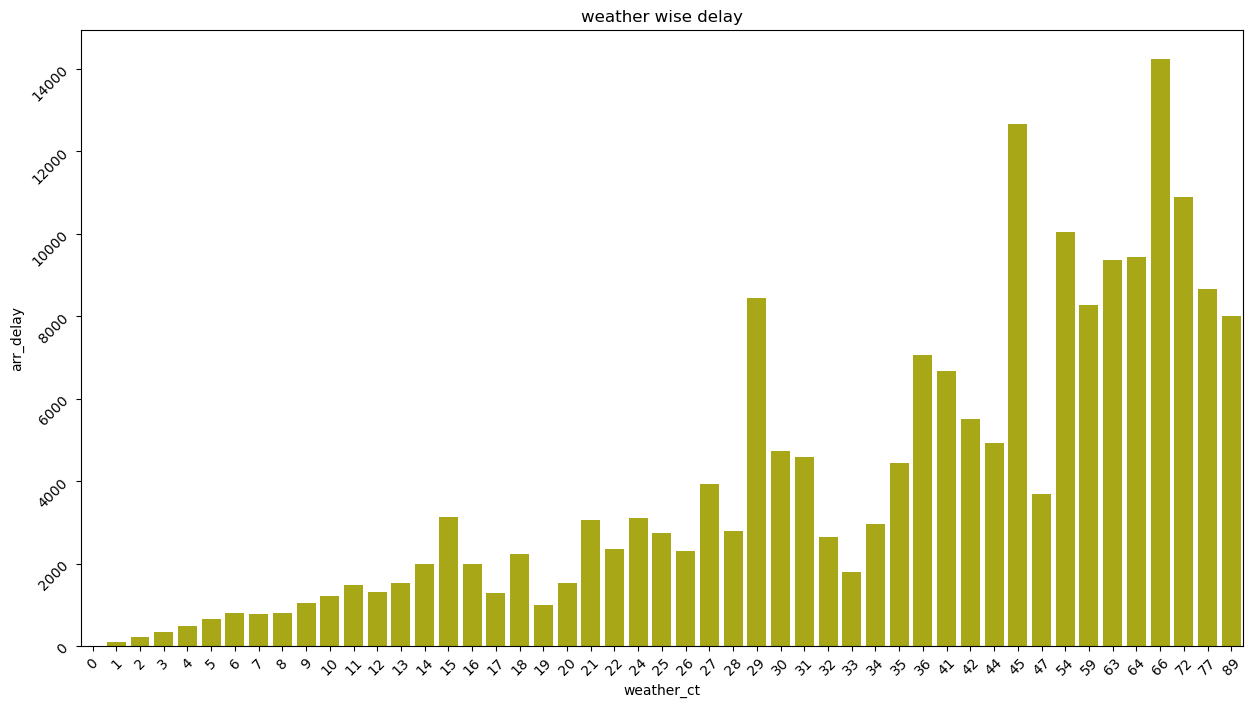

In [682]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.barplot(x='weather_ct',y='weather_delay',data=weather_delay,color='y')
plt.title('weather wise delay')
plt.xlabel('weather_ct')
plt.ylabel('arr_delay')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Analyze Delay by Day of the Week

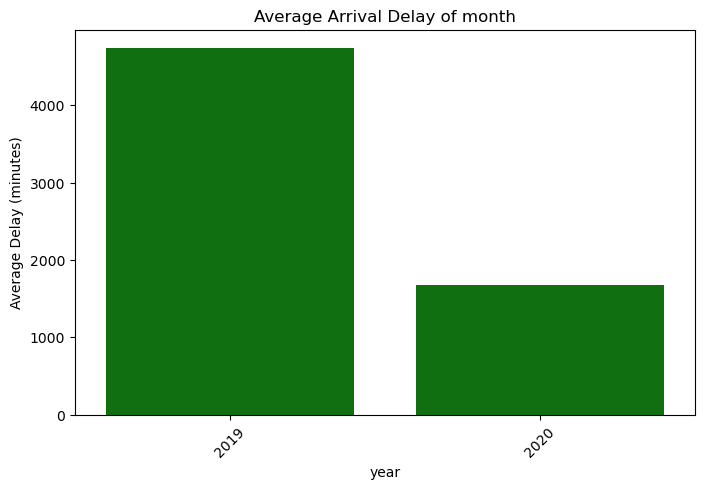

In [697]:
group=df.groupby('year')['arr_delay'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='arr_delay',data=group,color='g')

plt.title('Average Arrival Delay of month')
plt.xlabel('year')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Check Correlation Between Weather and Delay

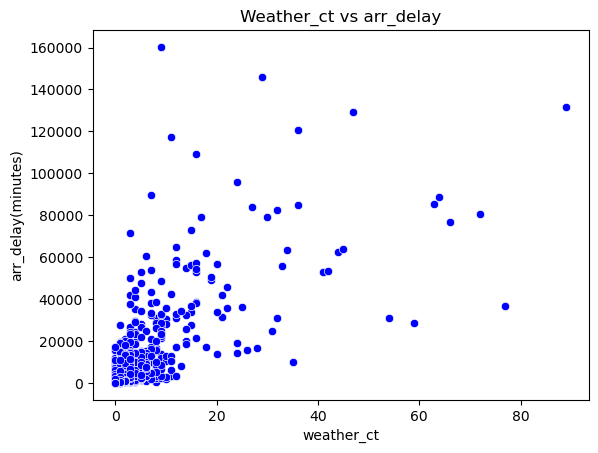

In [705]:
sns.scatterplot(x='weather_ct',y='arr_delay',data=df,color='b')
plt.title('Weather_ct vs arr_delay')
plt.xlabel('weather_ct')
plt.ylabel('arr_delay(minutes)')
plt.show()

 # Exporting and Saving Data

In [690]:
df.to_csv('airline_delay_data.csv',index=False)